In [155]:
import pandas as pd
import numpy as np
df=pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv', sep=',')
dataset = df.values
dataset = dataset[:,1:] # Removed serial number column

## Analysing Dataset

In [156]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = dataset[:,:7]
y = dataset[:,7]

scaler = preprocessing.StandardScaler().fit(X)
scaler.transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0) # 70% training and 30% test

positives = X[y>=0.5,:]
print("% +ve",len(positives)*100/len(dataset))
negatives = X[y<0.5,:]
print("% -ve",len(negatives)*100/len(dataset))

% +ve 92.6
% -ve 7.4


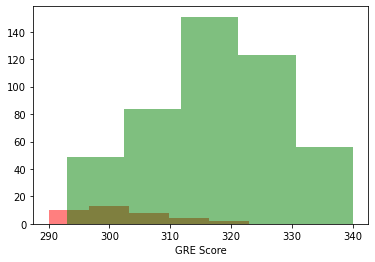

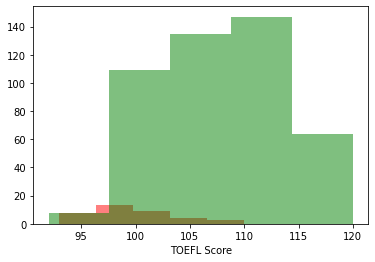

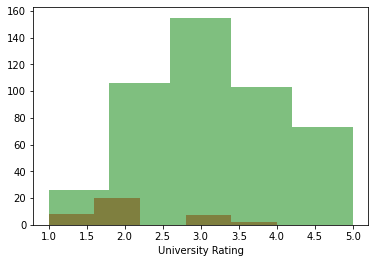

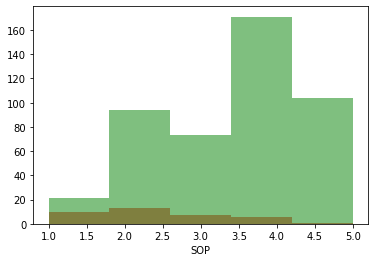

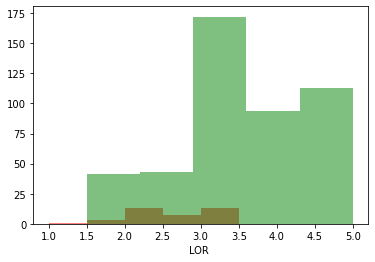

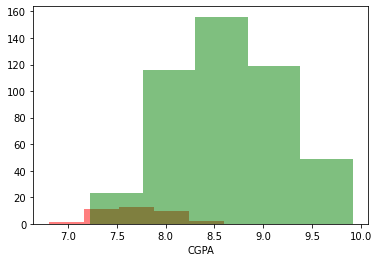

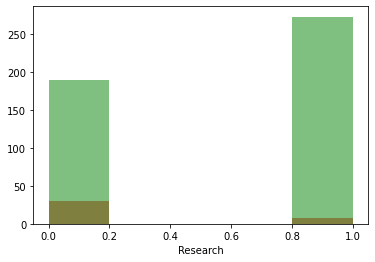

In [157]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

for i in range(7):
    n, bins, patches = plt.hist(negatives[:,i], 5, facecolor='red', alpha=0.5)
    n, bins, patches = plt.hist(positives[:,i], 5, facecolor='green', alpha=0.5)
    plt.xlabel(df.columns[i+1])
    plt.show()

In [158]:
import torch

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [159]:
class Feedforward(torch.nn.Module):
        def __init__(self):
            super(Feedforward, self).__init__()
            self.a1 = torch.nn.Linear(7,10)
            self.a2 = torch.nn.Linear(10,10)
            self.a3 = torch.nn.Linear(10, 1)
            
            self.relu = torch.nn.ReLU()
            self.sigmoid = torch.nn.Sigmoid()        
        def forward(self, x):
            z1 = self.relu(self.a1(x))
            z2 = self.relu(self.a2(z1))
            z3 = self.sigmoid(self.a3(z2))
            return z3

In [160]:
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = torch.nn.MSELoss()
        
    def forward(self,y_pred,y_real):
        return torch.sqrt(self.mse(y_pred,y_real))

## Training

In [161]:
model = Feedforward()
criterion = RMSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.006)

In [162]:
model.train()
epoch = 100000
loss_arr = []
for epoch in range(epoch):
    optimizer.zero_grad()    # Forward pass
    y_pred = model(X_train)    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
    if (epoch+1)%5000 == 0:
        print('Epoch {}: train loss: {}'.format((epoch+1), loss.item()))    # Backward pass
        loss_arr.append(float(loss.item()))
    loss.backward()
    optimizer.step()
print('Done.')

Epoch 5000: train loss: 0.06036805734038353
Epoch 10000: train loss: 0.060721661895513535
Epoch 15000: train loss: 0.05848242715001106
Epoch 20000: train loss: 0.05842240899801254
Epoch 25000: train loss: 0.058733489364385605
Epoch 30000: train loss: 0.055971261113882065
Epoch 35000: train loss: 0.05505917966365814
Epoch 40000: train loss: 0.054905761033296585
Epoch 45000: train loss: 0.053234364837408066
Epoch 50000: train loss: 0.052066620439291
Epoch 55000: train loss: 0.053400710225105286
Epoch 60000: train loss: 0.052333906292915344
Epoch 65000: train loss: 0.05425899103283882
Epoch 70000: train loss: 0.05347790569067001
Epoch 75000: train loss: 0.05127570033073425
Epoch 80000: train loss: 0.052370138466358185
Epoch 85000: train loss: 0.05671771988272667
Epoch 90000: train loss: 0.05930590257048607
Epoch 95000: train loss: 0.05910366401076317
Epoch 100000: train loss: 0.05805196240544319
Done.


## Analysing Trained model

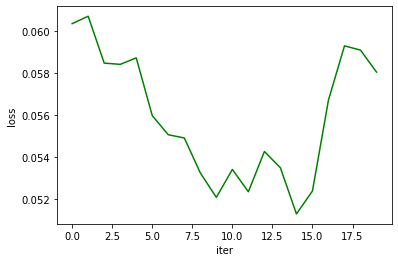

In [163]:
plt.plot(list(range(len(loss_arr))),loss_arr,color='green')
plt.ylabel('loss')
plt.xlabel('iter')
plt.show()

# Task Evaluation

In [164]:
from sklearn import metrics
model.eval()
y_pred = model(X_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print('Loss on last 100 datapoints ' , after_train.item())
print("R^2 Score:",metrics.r2_score(y_test.detach().numpy(), y_pred.detach().numpy()))

Loss on last 100 datapoints  0.06344707310199738
R^2 Score: 0.7695054150230543
